In [2]:
import pandas as pd
from BikeStoreUtils import create_connection
import matplotlib.pyplot as plt

In [5]:
conn = create_connection(config_file = 'terrabikes_bi.ini')
cursor = conn.cursor()

In [12]:
sql = """ 
        with top_emp as (select e.employee_id,
round(sum(sa.price),2) as Revenue_generated
from calendar c, employee e, sales sa, performance p
where c.calendar_key = sa.calendar_key
and e.employee_key = p.employee_key
and p.order_detail_key = sa.order_detail_key
and c.year = 2023
group by c.year, e.employee_id, e.employee_name
order by 2 desc
limit 5)
select c.year, e.employee_id, e.employee_name,
round(sum(sa.price),2) as Revenue_generated, sum(sa.qty) as count_of_orders
from calendar c, employee e, sales sa, performance p, top_emp ep
where c.calendar_key = sa.calendar_key
and e.employee_key = p.employee_key
and p.order_detail_key = sa.order_detail_key
and e.employee_id = ep.employee_id
group by c.year, e.employee_id, e.employee_name
order by 1,4 desc
"""
cursor.execute(sql)
result = cursor.fetchall()
df = pd.DataFrame(result, columns = ['Year', 'Employee_ID', 'Employee_Name', 'Revenue_generated', 'count_of_orders'])
display(df)

,Year,Employee_ID,Employee_Name,Revenue_generated,count_of_orders
0,2020,159133,Whittaker Wooles,15769.04,19
1,2020,199862,Hayyim Martinot,12120.08,17
2,2020,315540,Nina Jouhning,10585.72,15
3,2020,338373,Hy Duester,10310.62,14
4,2020,790530,Kean Seckom,9970.22,15
5,2021,338373,Hy Duester,40105.14,56
6,2021,159133,Whittaker Wooles,33330.53,46
7,2021,790530,Kean Seckom,30598.22,43
8,2021,315540,Nina Jouhning,19726.07,29
9,2021,199862,Hayyim Martinot,19615.21,28


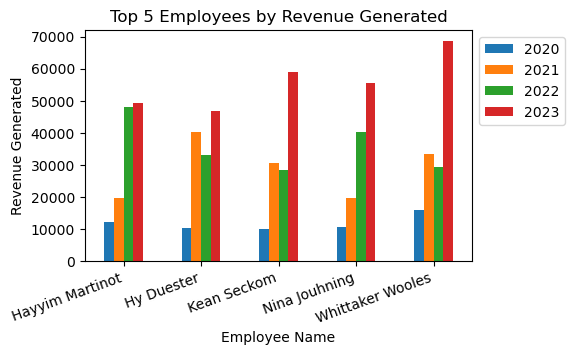

In [31]:
pivot_df = df.pivot(index = 'Employee_Name', columns = 'Year', values = 'Revenue_generated')
fig, ax = plt.subplots(figsize = (5, 3))
pivot_df.plot(kind = 'bar', ax = ax)
ax.set_title('Top 5 Employees by Revenue Generated')
ax.set_xlabel('Employee Name')
ax.set_ylabel('Revenue Generated')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20, ha = 'right')
ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show()

In [34]:
sql = """
    select r.region,
    round(sum(sa.price),2) as Revenue_generated, sum(sa.qty) as count_of_orders
    from employee e, sales sa, performance p, region r
    where e.employee_key = p.employee_key
    and p.order_detail_key = sa.order_detail_key
    and sa.region_key = r.region_key
    group by r.region
    order by 1 desc;

"""
cursor.execute(sql)
result = cursor.fetchall()
df = pd.DataFrame(result, columns = ['Region', 'Revenue_generated', 'count_of_orders'])
display(df)

,Region,Revenue_generated,count_of_orders
0,West,528521.86,713
1,Southwest,401749.39,541
2,South,679189.14,897
3,New England,64037.57,89
4,Midwest,267141.76,372
5,Middle Atlantic,334723.20,447


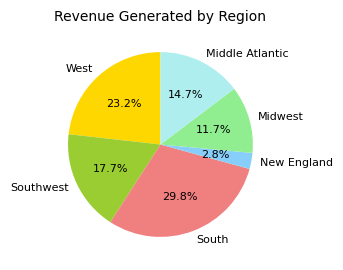

In [49]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'paleturquoise', 'peachpuff']
labels = df['Region']
values1 = df['Revenue_generated']
fig, ax = plt.subplots(figsize = (5, 3))
ax.pie(values1, labels = labels, autopct = '%1.1f%%', startangle = 90, colors = colors, textprops={'fontsize': 8})
ax.set_title('Revenue Generated by Region', fontsize = 10)
plt.show()

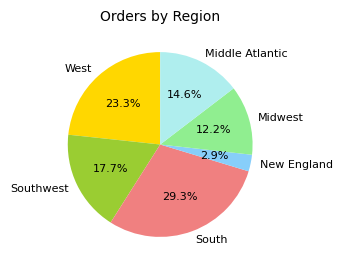

In [50]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'paleturquoise', 'peachpuff']
labels = df['Region']
values2 = df['count_of_orders']
fig, ax = plt.subplots(figsize = (5, 3))
ax.pie(values2, labels = labels, autopct = '%1.1f%%', startangle = 90,colors = colors, textprops={'fontsize': 8})
ax.set_title('Orders by Region', fontsize = 10)
plt.show()

In [51]:
cursor.close()
conn.close()